In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Chuẩn bị dữ liệu
Dữ liệu chữ số viết tay, các số từ 0 đến 9

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x/255.0

Chia dữ liệu thành TRAIN, VALIDATION, TEST

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

Shape of x_train:  (44800, 28, 28)
Shape of y_train:  (44800,)


## Xây dựng Model

Hàm callback để dừng training nếu đạt được độ chính xác hợp lý

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(512, activation=tf.nn.relu),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [8]:
history = model.fit(x_train, y_train, 
                    epochs=15,
                    validation_data=(x_val, y_val)
                    #callbacks=[callbacks]
                    )

Epoch 1/15
1400/1400 [==============================] - 6s 4ms/step - loss: 0.2290 - accuracy: 0.9317 - val_loss: 0.1260 - val_accuracy: 0.9615
Epoch 2/15
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0917 - accuracy: 0.9712 - val_loss: 0.0917 - val_accuracy: 0.9721
Epoch 3/15
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.0866 - val_accuracy: 0.9735
Epoch 4/15
1400/1400 [==============================] - 6s 4ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0760 - val_accuracy: 0.9773
Epoch 5/15
1400/1400 [==============================] - 6s 4ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0765 - val_accuracy: 0.9766
Epoch 6/15
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0821 - val_accuracy: 0.9768
Epoch 7/15
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0799 - val_accuracy:

## Kết quả

In [9]:
model.evaluate(x_test, y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9781


[0.11073435842990875, 0.9781428575515747]

## Đánh giá kết quả

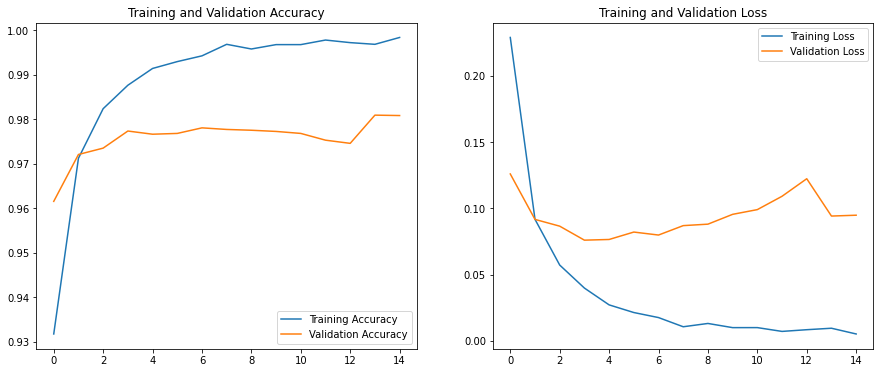

In [10]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Từ đồ thị Loss Function(Epoch) thì thấy là nên dừng lại sau epoch thứ 4 vì sau epoch này Validation Loss tăng lên => hiện tượng overfitting
- Dừng sớm gọi là Early Stopping